In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import google.generativeai as genai
import ast
import re

c:\Users\JolizeLightfoot\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
# Replace with your actual API key
genai.configure(api_key="YOUR_API_KEY")



# 🧴 Sephora Product Reviews Analysis 🧴  
### Exploring Skincare Trends Through User Reviews

**Dataset Source:** [Sephora Products and Skincare Reviews on Kaggle](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews)  
**Collected:** March 2023  

---

## 📌 Project Overview

This notebook explores a comprehensive dataset of Sephora beauty products and user reviews, with a special focus on **skincare** items. The dataset includes:

- **Over 8,000 products** with details such as brand, price, rating, and size.
- **About 1 million user reviews** including user ratings, recommendations, feedback, and personal attributes (e.g., skin type, hair color).

Our primary interest lies in the **textual user reviews**, which often contain rich insights about customer experiences, satisfaction, and product effectiveness.

---

## 🎯 Objectives

1. **Exploratory Data Analysis (EDA):**
   - Understand the distribution of ratings, review counts, and product popularity.
   - Analyze user characteristics (e.g., skin type, tone) in relation to product feedback.

2. **Natural Language Processing:**
   - Use a large language model (LLM) such as **ChatGPT** or **Google Gemini** to:
     - Perform **sentiment analysis** on the reviews.
     - Extract **common themes** and **frequent concerns/praises** across products.
     - Identify **trends** among different user types (e.g., dry vs. oily skin).

---

## 🧠 Why LLMs?

Traditional sentiment tools often miss the nuance in human-written reviews. By using a modern LLM, we aim to capture:
- Subtle emotions,
- Product-specific language (e.g., "non-comedogenic", "absorbs well"),
- Themes around effectiveness, packaging, price perception, and more.

---

## 🔧 Tools & Libraries
- **Pandas**, **NumPy** for data handling  
- **Matplotlib**, **Seaborn** for visualization  
- **LLM APIs** (OpenAI, Gemini) for advanced NLP tasks

---

Ready to dive in and uncover what customers are really saying about skincare products on Sephora.


# Import data & initial discovery

### Product Info

In [3]:
product_info_df=pd.read_csv('product_info.csv')
product_info_df.head(5)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


#### Product Info Data Dictionary

**product_id:**
The unique identifier for the product from the site


**product_name:**
The full name of the product


**brand_id:**
The unique identifier for the product brand from the site


**brand_name:**
The full name of the product brand


**loves_count:**
The number of people who have marked this product as a favorite


**rating:**
The average rating of the product based on user reviews


**reviews:**
The number of user reviews for the product


**size:**
The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type


**variation_type:**
The type of variation parameter for the product (e.g. Size, Color)


**variation_value:**
The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)

In [4]:
product_info_df.info()
product_info_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
count,8494,8494,8494.000000,8494,8.494000e+03,8216.000000,8216.000000,6863,7050,6896,...,8494.000000,8494.000000,8494.000000,6287,8494,8486,7504,8494.000000,2754.000000,2754.000000
unique,8494,8415,NaN,304,NaN,NaN,NaN,2055,7,2729,...,NaN,NaN,NaN,4417,9,41,118,NaN,NaN,NaN
top,P505461,Discovery Set,NaN,SEPHORA COLLECTION,NaN,NaN,NaN,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,NaN,NaN,NaN,"['Layerable Scent', 'Floral Scent']",Skincare,Women,Perfume,NaN,NaN,NaN
freq,1,3,NaN,352,NaN,NaN,NaN,500,4043,374,...,NaN,NaN,NaN,64,2420,875,568,NaN,NaN,NaN
mean,NaN,NaN,5422.440546,NaN,2.917957e+04,4.194513,448.545521,NaN,NaN,NaN,...,0.219096,0.073699,0.279374,NaN,NaN,NaN,NaN,1.631622,53.792023,39.665802
std,NaN,NaN,1709.595957,NaN,6.609212e+04,0.516694,1101.982529,NaN,NaN,NaN,...,0.413658,0.261296,0.448718,NaN,NaN,NaN,NaN,5.379470,58.765894,38.685720
min,NaN,NaN,1063.000000,NaN,0.000000e+00,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,3.000000
25%,NaN,NaN,5333.000000,NaN,3.758000e+03,3.981725,26.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,22.000000,19.000000
50%,NaN,NaN,6157.500000,NaN,9.880000e+03,4.289350,122.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,32.000000,28.000000
75%,NaN,NaN,6328.000000,NaN,2.684125e+04,4.530525,418.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,59.000000,42.000000


In [5]:
# Check for missing values
missing_values = product_info_df.isnull().sum()

In [6]:
missing_values[missing_values > 0].sort_values(ascending=False)

sale_price_usd        8224
value_price_usd       8043
variation_desc        7244
child_max_price       5740
child_min_price       5740
highlights            2207
size                  1631
variation_value       1598
variation_type        1444
tertiary_category      990
ingredients            945
reviews                278
rating                 278
secondary_category       8
dtype: int64

In [7]:
# Check for duplicates
duplicates = product_info_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Product Reviews

In [8]:
product_reviews_0_250_df=pd.read_csv('reviews_0-250.csv')
product_reviews_250_500_df=pd.read_csv('reviews_250-500.csv')
product_reviews_500_750_df=pd.read_csv('reviews_500-750.csv')
product_reviews_750_1250_df=pd.read_csv('reviews_750-1250.csv')
product_reviews_1250_end_df=pd.read_csv('reviews_1250-end.csv')

C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\1909211716.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  product_reviews_0_250_df=pd.read_csv('reviews_0-250.csv')
C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\1909211716.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  product_reviews_750_1250_df=pd.read_csv('reviews_750-1250.csv')
C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\1909211716.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  product_reviews_1250_end_df=pd.read_csv('reviews_1250-end.csv')


In [9]:
# product_reviews_0_250_df
product_reviews_0_250_df.head(5)


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [10]:
product_reviews_0_250_df.info()
product_reviews_0_250_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            484644 non-null  float64
 4   helpfulness               270298 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
count,602130.000000,602130,602130.000000,484644.000000,270298.000000,602130.000000,602130.000000,602130.000000,602130,601131,435119,496074,463642,527447,461049,602130,602130,602130,602130.000000
unique,NaN,383697,NaN,NaN,NaN,NaN,NaN,NaN,5317,508467,202373,14,6,4,7,250,249,60,NaN
top,NaN,1696370280,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21,review message autotest,Love it!,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Tatcha,NaN
freq,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,1451,13,3421,141402,243751,292308,218139,16138,16138,40681,NaN
mean,301064.500000,NaN,4.311838,0.837922,0.769722,3.660661,0.765473,2.895189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.723937
std,173820.103131,NaN,1.143692,0.368522,0.319103,25.848330,4.968115,22.628880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.743990
min,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,150532.250000,NaN,4.000000,1.000000,0.666667,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.500000
50%,301064.500000,NaN,5.000000,1.000000,0.944444,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000
75%,451596.750000,NaN,5.000000,1.000000,1.000000,3.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000


In [11]:
# Combine all reviews dataframes into one
product_reviews_df = pd.concat([product_reviews_0_250_df, product_reviews_250_500_df, product_reviews_500_750_df, product_reviews_750_1250_df, product_reviews_1250_end_df], ignore_index=True)

In [12]:
product_reviews_df.head(10)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.00,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
5,5,42802569154,4,1.0,1.00,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,6,6941883808,2,0.0,0.25,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7,7,27926227988,5,1.0,NaN,0,0,0,2023-03-19,I use this at night or while I’m putting makeu...,Works great,fairLight,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,8,7656791726,5,1.0,1.00,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
9,9,38727834382,5,1.0,1.00,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [13]:
product_reviews_df.info()
product_reviews_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
count,1.094411e+06,1094411,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1094411,1092967,783757,923872,884783,982854,867643,1094411,1094411,1094411,1.094411e+06
unique,NaN,578653,NaN,NaN,NaN,NaN,NaN,NaN,5317,969419,364105,14,6,4,7,2351,2334,142,NaN
top,NaN,1696370280,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-11,I received this in a sample. I have alot of ac...,Love it!,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,CLINIQUE,NaN
freq,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,2028,59,6125,266418,471181,544513,403099,16138,16138,49029,NaN
mean,1.989864e+05,NaN,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900838e+01
std,1.749886e+05,NaN,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.004338e+01
min,0.000000e+00,NaN,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00
25%,5.590600e+04,NaN,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+01
50%,1.308240e+05,NaN,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+01
75%,3.285265e+05,NaN,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000e+01


In [14]:
# Check for missing values
missing_values = product_info_df.isnull().sum()

In [15]:
missing_values[missing_values > 0].sort_values(ascending=False)

sale_price_usd        8224
value_price_usd       8043
variation_desc        7244
child_max_price       5740
child_min_price       5740
highlights            2207
size                  1631
variation_value       1598
variation_type        1444
tertiary_category      990
ingredients            945
reviews                278
rating                 278
secondary_category       8
dtype: int64

In [16]:
#Check for duplicates
duplicates = product_reviews_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# Exploratory Analysis

## 📊  Distribution of Product Ratings
**Goal**:
Visualize the spread of user ratings to understand general customer sentiment.

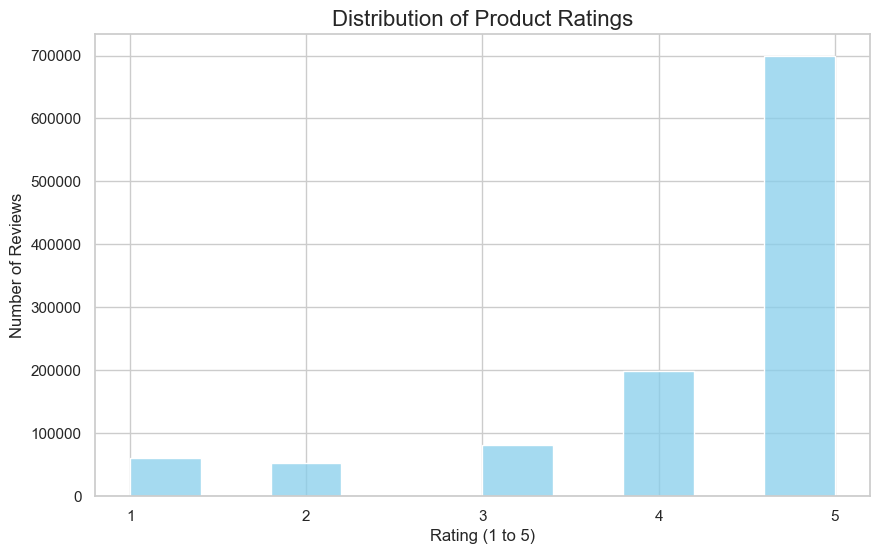

In [17]:
# Set plot style
sns.set(style="whitegrid")

# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(product_reviews_df['rating'], bins=10, kde=False, stat='count', color='skyblue')

plt.title('Distribution of Product Ratings', fontsize=16)
plt.xlabel('Rating (1 to 5)')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.show()


## ❤️ Top 20 Most 'Loved' Products
**Goal**:
Identify the products with the highest number of "loves" (favorites) from users — a good proxy for popularity or cult-favorite status

C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\2813283239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_loved, y='product_name', x='loves_count', palette='Reds_r')


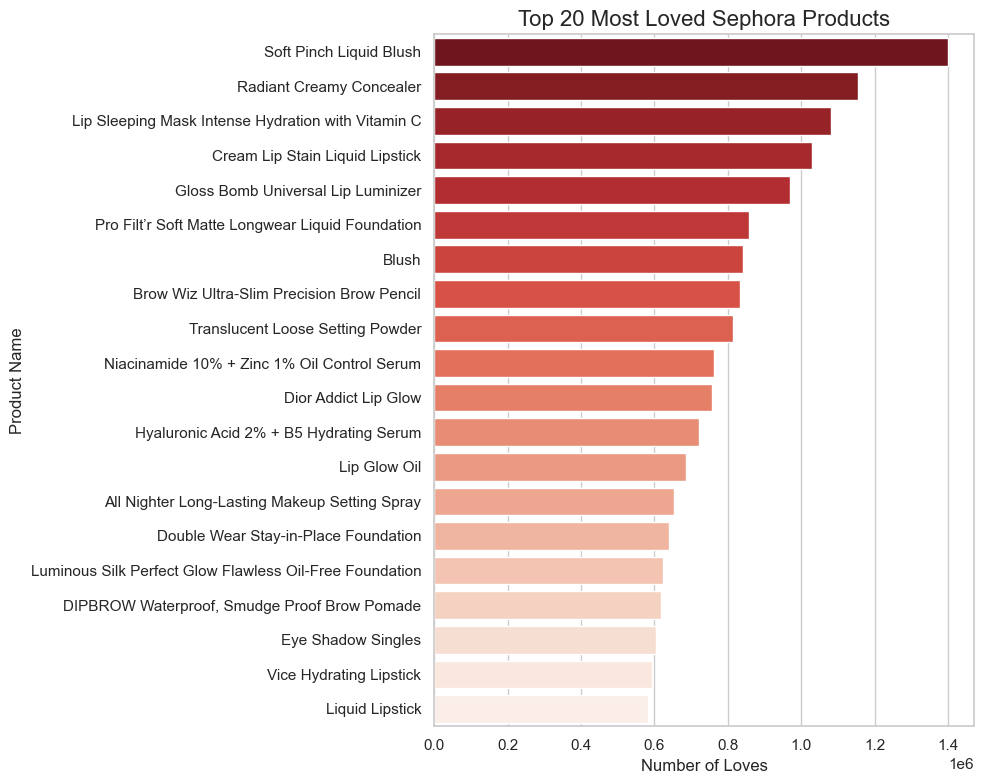

In [18]:
# Sort products by loves_count and drop duplicates to avoid variation repeats
top_loved = product_info_df.sort_values(by='loves_count', ascending=False).drop_duplicates(subset='product_id').head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=top_loved, y='product_name', x='loves_count', palette='Reds_r')

plt.title('Top 20 Most Loved Sephora Products', fontsize=16)
plt.xlabel('Number of Loves')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

## 🏷️ Average Rating by Brand (Top Brands)
**Goal:**
Compare customer satisfaction across brands by looking at their average product ratings.

C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\2231490032.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, y='brand_name', x='avg_rating', palette='viridis')


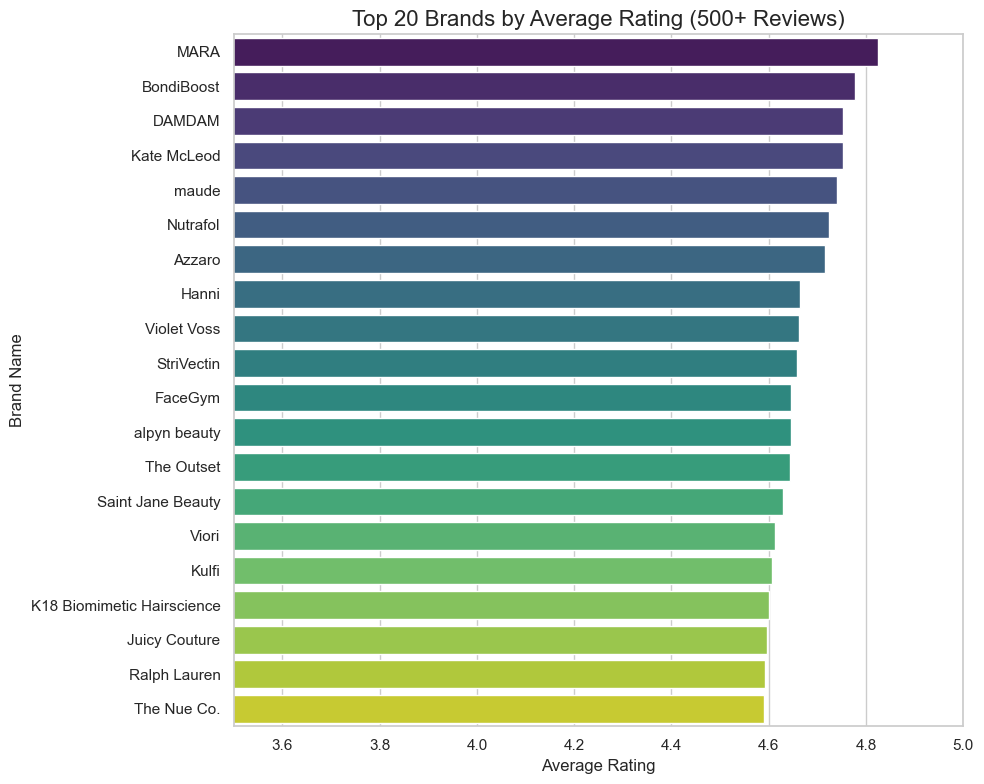

In [19]:
# Group by brand and calculate average rating + number of reviews
brand_ratings = (
    product_info_df
    .groupby('brand_name')
    .agg(avg_rating=('rating', 'mean'), review_count=('reviews', 'sum'))
    .reset_index()
)

# Filter to brands with enough reviews for significance
top_brands = brand_ratings[brand_ratings['review_count'] > 500].sort_values(by='avg_rating', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=top_brands, y='brand_name', x='avg_rating', palette='viridis')

plt.title('Top 20 Brands by Average Rating (500+ Reviews)', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Brand Name')
plt.xlim(3.5, 5.0)  # Ratings are usually between 1 and 5
plt.tight_layout()
plt.show()


## 🧬 Skin Type vs. Rating Distribution
**Goal:**
Visualize how users with different skin types rate products. This can help reveal which skin types tend to be more or less satisfied overall.

C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\2922866569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=product_reviews_df, x='skin_type', y='rating', palette='Set3')


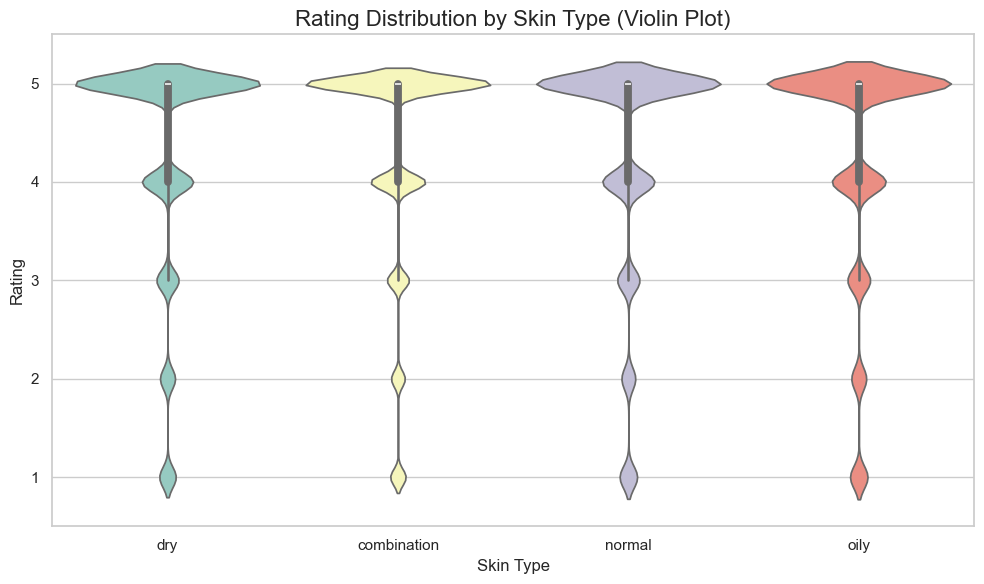

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=product_reviews_df, x='skin_type', y='rating', palette='Set3')

plt.title('Rating Distribution by Skin Type (Violin Plot)', fontsize=16)
plt.xlabel('Skin Type')
plt.ylabel('Rating')
plt.ylim(0.5, 5.5)
plt.tight_layout()
plt.show()


## 🕒  Review Volume Over Time
**Goal:**
Understand how the number of reviews has changed over time — revealing possible trends, product launch waves, or seasonal effects (like skincare spikes in winter).

In [21]:
# Convert to datetime format
product_reviews_df['submission_time'] = pd.to_datetime(product_reviews_df['submission_time'], errors='coerce')


In [22]:
# Group by month
monthly_reviews = (
    product_reviews_df
    .dropna(subset=['submission_time'])
    .set_index('submission_time')
    .resample('M')  # Monthly frequency
    .size()
    .reset_index(name='review_count')
)


C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\1595483689.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')  # Monthly frequency


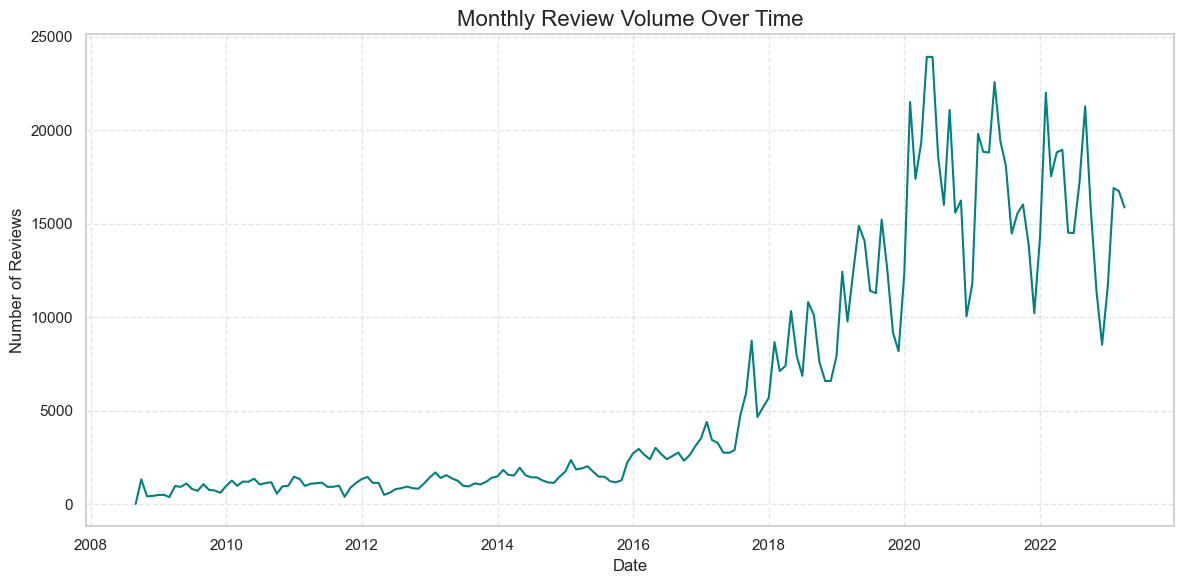

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_reviews, x='submission_time', y='review_count', color='teal')

plt.title('Monthly Review Volume Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 💸Price vs. Average Rating
**Goal:**
Explore whether higher-priced products tend to have better ratings — or if price doesn't correlate with customer satisfaction.

In [24]:
# Drop rows with missing price or rating
price_rating_df = product_info_df[['product_name', 'brand_name', 'price_usd', 'rating']].dropna()

# Optional: remove extreme outliers
price_rating_df = price_rating_df[(price_rating_df['price_usd'] < 500) & (price_rating_df['price_usd'] > 0)]


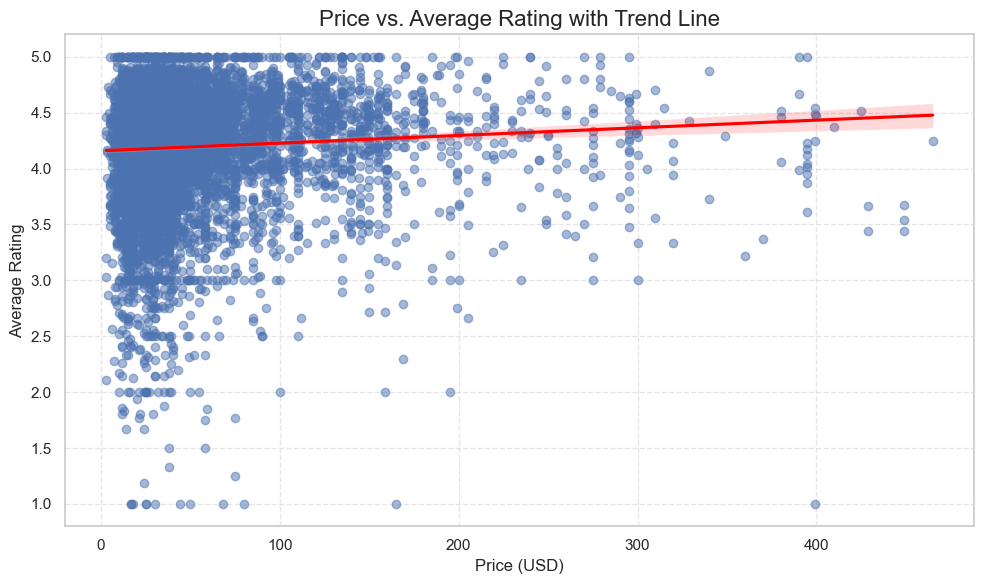

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(data=price_rating_df, x='price_usd', y='rating', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Price vs. Average Rating with Trend Line', fontsize=16)
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ⭐Helpfulness vs. Review Rating
**Goal:**
Understand how the perceived helpfulness of a review relates to the rating it gives. Are highly rated reviews considered more helpful, or do detailed negative reviews stand out?

In [26]:
# Keep only reviews with helpfulness scores and ratings
helpfulness_df = product_reviews_df[['rating', 'helpfulness', 'review_text']].dropna(subset=['helpfulness', 'rating'])


C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\233764969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=helpfulness_df, x='rating', y='helpfulness', palette='BuGn')


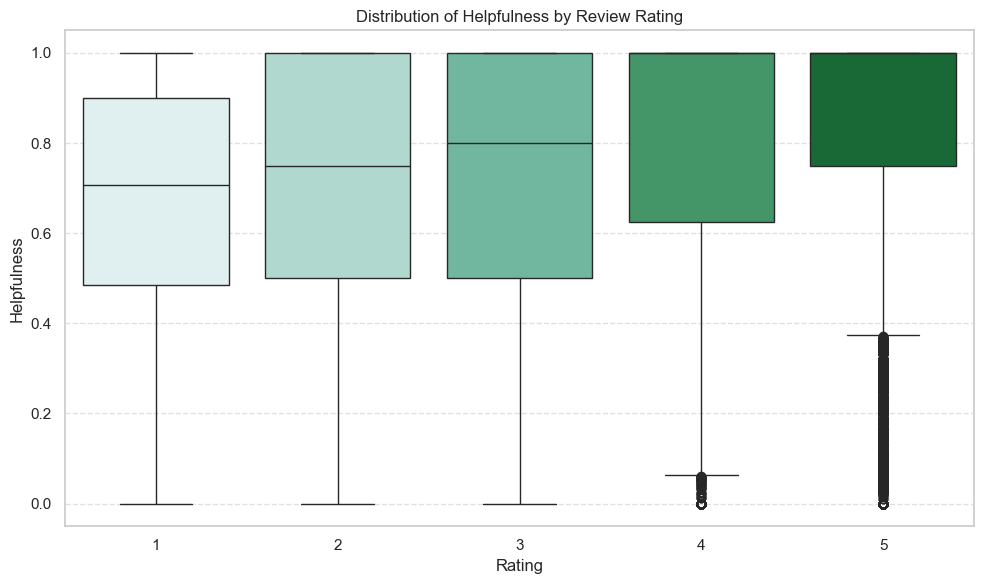

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=helpfulness_df, x='rating', y='helpfulness', palette='BuGn')

plt.title('Distribution of Helpfulness by Review Rating')
plt.xlabel('Rating')
plt.ylabel('Helpfulness')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Natural Language Processing

In [28]:
# We will use the google generative AI API to extract sentiment and themes from the reviews
# Load the generative model
model = genai.GenerativeModel('gemini-2.0-flash')

In [ ]:
#Because the API is not free, we will only process a small sample of reviews for demonstration purposes
# Filter reviews from Feb 2023 onwards
reviews_2023_onwards_df = product_reviews_df[product_reviews_df['submission_time'] >= '2023-02-01']

# Get the row count
row_count_reviews_2023_onwards  = len(reviews_2023_onwards_df )
print(f"Number of reviews from Feb 2023 onwards: {row_count_reviews_2023_onwards}")

Number of reviews from Feb 2023 onwards: 32624


In [30]:
def analyze_batch(reviews):
    """
    Analyze a batch of product reviews using a generative AI model.

    This function sends a batch of product reviews to the AI model for analysis. 
    The AI model extracts the sentiment (positive, negative, or neutral) and 
    identifies three key themes for each review. The results are returned in 
    a structured Python list format.

    Parameters:
    reviews (list): A list of strings, where each string is a product review.

    Returns:
    list: A list of lists where each sublist contains:
          - Sentiment (str): 'positive', 'negative', or 'neutral'.
          - Theme1 (str): The first identified theme.
          - Theme2 (str): The second identified theme.
          - Theme3 (str): The third identified theme.
          Example: [['positive', 'hydrating', 'scent', 'texture'], ...]

    Notes:
    - The function uses the `model.generate_content` method to interact with the AI model.
    - If an error occurs during processing, an empty dictionary is returned.
    """
    # Construct the prompt for the AI model
    prompt_content = "Analyze the sentiment and themes for each of the following product reviews:\n\n"
    
    # Add each review to the prompt with its index
    for i, review in enumerate(reviews):
        prompt_content += f"Review {i+1}: \"{review}\"\n"
    
    # Add instructions for the AI model on how to format the response
    prompt_content += '''For each review, provide the sentiment (positive, negative, or neutral) and 3 themes (e.g., 'long-lasting', 'hydrating', 'scent'). //
    per review.Each theme must be one word only. Return the results in a python list format, starting with sentiment, then a comma, followed by the themes, split by commas. Must be in same order as original list provided to you. 
    Example: ["positive", "long-lasting", "hydrating", "scent"], ["negative", "packaging", "price", "texture"]\n\n   
    These themes will be used to analyze commonly occuring thmese in the reviews.
    Don't include any other text or explanation, just the list. Please ensure the response is in a valid Python list format and use double quotes for strings.
    It is VERY important that you follow the instructions exactly as provided and the themes are one word only. If the theme is something like 'long-lasting', it should be 'long-lasting' and not 'long lasting'.
    Ensure you have commas in all the right places, double check before you give me the response. Ensure you have a comma between the last few list items
    Ensure you have all the opening and closing brackets in the right places\
    '''

    try:
        # Send the prompt to the AI model and generate a response
        response = model.generate_content(prompt_content)
        response.resolve()  # Ensure the response is fully processed
        
        # Check if the response contains text
        if response.text:
            results = response.text
            return results
        else:
            # Return an empty dictionary if no text is returned
            return {}
    except Exception as e:
        # Handle any exceptions that occur during processing
        print(f"Error processing batch: {e}")
        return {}

In [31]:
#Create an empty DataFrame to store the analyzed results
analyzed_df = pd.DataFrame(columns=[
    'Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
    'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count',
    'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color',
    'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name',
    'price_usd', 'sentiment', 'theme1', 'theme2', 'theme3', 'themes'
])

# Batch the DataFrame
batch_size = 75  # Adjust this based on your testing
num_batches = (len(reviews_2023_onwards_df) + batch_size - 1) // batch_size

# Loop through each batch and analyze the reviews
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, len(product_reviews_df))
    batch_reviews_df = product_reviews_df[start_index:end_index]
    batch_reviews = batch_reviews_df['review_text']

    #Print start time
    print('Start time: ', pd.Timestamp.now())
    #Call the function to analyze the batch of reviews
    print('Analyzing bacth of reviews...'+str(i+1))
    batch_results_raw = analyze_batch(batch_reviews)


    # Convert the results to a list of lists
    # Replace ( with [ and ) with ] to make it a valid Python list)
    batch_results = batch_results_raw.replace("(", "[").replace(")", "]")
    batch_results = batch_results.replace(";", ",")
    batch_results = batch_results.replace(".", ",")
    batch_results = batch_results.replace('"""', '')
    #Replace ' with empty character to make it a valid Python list
    batch_results = batch_results.replace("'", '')
    # Add missing commas between adjacent lists
    #batch_results = re.sub(r'\]\s*\[', '],\n[', batch_results)
    # Ensure final comma before closing the outer list
    #batch_results = re.sub(r'(\])\s*\n\]', r'\1,\n]', batch_results)
    
    cleaned = batch_results.strip().removeprefix("```python").removesuffix("```")
    parsed_list = ast.literal_eval(cleaned)

    #If the response has returned too many list items, slice it so we ony get the first 4 items
    for i in range(len(parsed_list)):    
        if len(parsed_list[i]) > 4:
            parsed_list[i] = parsed_list[i][:4]

    # Build a DataFrame with the results
    response_df= pd.DataFrame(parsed_list, columns=['sentiment', 'theme1', 'theme2', 'theme3'])
    # Combine last 3 columns into a single list column
    response_df['themes'] = response_df[['theme1', 'theme2', 'theme3']].values.tolist()

    #Merge the results with the batch dataframe
    batch_reviews_df = pd.concat([batch_reviews_df.reset_index(drop=True), response_df], axis=1)

    #Merge the batch results with the main DataFrame
    analyzed_df = pd.concat([analyzed_df, batch_reviews_df], ignore_index=True)

#Print end time
print('End time: ', pd.Timestamp.now())

Start time:  2025-05-10 16:28:33.554201
Analyzing bacth of reviews...1


C:\Users\JolizeLightfoot\AppData\Local\Temp\ipykernel_32368\3664777371.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  analyzed_df = pd.concat([analyzed_df, batch_reviews_df], ignore_index=True)


Start time:  2025-05-10 16:28:52.350926
Analyzing bacth of reviews...2
Start time:  2025-05-10 16:28:59.483316
Analyzing bacth of reviews...3
Start time:  2025-05-10 16:29:06.770901
Analyzing bacth of reviews...4
Start time:  2025-05-10 16:29:13.365735
Analyzing bacth of reviews...5
Start time:  2025-05-10 16:29:19.972699
Analyzing bacth of reviews...6
Start time:  2025-05-10 16:29:26.594420
Analyzing bacth of reviews...7
Start time:  2025-05-10 16:29:32.812390
Analyzing bacth of reviews...8
Start time:  2025-05-10 16:29:39.428536
Analyzing bacth of reviews...9
Start time:  2025-05-10 16:29:45.996369
Analyzing bacth of reviews...10
Start time:  2025-05-10 16:29:52.794719
Analyzing bacth of reviews...11
Start time:  2025-05-10 16:29:59.256665
Analyzing bacth of reviews...12
Start time:  2025-05-10 16:30:06.813537
Analyzing bacth of reviews...13
Start time:  2025-05-10 16:30:13.033872
Analyzing bacth of reviews...14
Start time:  2025-05-10 16:30:19.616858
Analyzing bacth of reviews...15


In [33]:
#Double check the length of the analyzed DataFrame to ensure all reviews have been processed
len(analyzed_df)

32655

In [44]:
#Remove themes column from the analyzed DataFrame
duplicate_check_df = analyzed_df.drop(columns=['themes'])
duplicates = duplicate_check_df.duplicated().sum()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [34]:
#preview the first 20 rows of the analyzed DataFrame
analyzed_df.head(20)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,hair_color,product_id,product_name,brand_name,price_usd,sentiment,theme1,theme2,theme3,themes
0,0,1741593524,5,1.0,1.000000,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,...,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,positive,hydrating,cleansing,gentle,"[hydrating, cleansing, gentle]"
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative,vaseline,expectations,hype,"[vaseline, expectations, hype]"
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,...,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive,hydrating,difference,dryness,"[hydrating, difference, dryness]"
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,...,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive,texture,scent,everyday,"[texture, scent, everyday]"
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",...,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive,dryness,price,hydrating,"[dryness, price, hydrating]"
5,5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,...,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive,scent,hydrating,packaging,"[scent, hydrating, packaging]"
6,6,6941883808,2,0.0,0.250000,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,...,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative,blackheads,dryness,packaging,"[blackheads, dryness, packaging]"
7,7,27926227988,5,1.0,NaN,0,0,0,2023-03-19,I use this at night or while I’m putting makeu...,...,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive,reapply,night,love,"[reapply, night, love]"
8,8,7656791726,5,1.0,1.000000,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,...,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive,dryness,environment,purchase,"[dryness, environment, purchase]"
9,9,38727834382,5,1.0,1.000000,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,...,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive,scent,soft,obsessed,"[scent, soft, obsessed]"


In [35]:
#Export the analysed dataframe to a CSV file
analyzed_df.to_csv('analyzed_reviews.csv', index=False)